In [1]:
import requests
import json
import datetime as dt
import time
import requests
import regex as re
import collections
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter
from termcolor import colored

import os
from os import path
from wordcloud import WordCloud

import scipy.stats as stats
import statistics
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### EDA Visualizations 

Highest variance vs Lowest Variance countries in infrastructure and # of cases

In [2]:
infra_c = pd.read_csv('../Data/Infrastructure/Cleaned_Infrastructure/infra_clean.csv')

In [3]:
infra_cov = pd.read_csv('../Data/Infrastructure/infrastructure_cov/infra_cov.csv')

In [4]:
spend_c = pd.read_csv('../Data/Infrastructure/Cleaned_Infrastructure/hspend_clean.csv')

In [5]:
spend_cov = pd.read_csv('../Data/Infrastructure/infrastructure_cov/spend_cov.csv')

In [6]:
tech_c = pd.read_csv('../Data/Infrastructure/Cleaned_Infrastructure/tech_clean.csv')

In [7]:
tech_cov = pd.read_csv('../Data/Infrastructure/infrastructure_cov/tech_cov.csv')

In [8]:
workers_c = pd.read_csv('../Data/Infrastructure/Cleaned_Infrastructure/workers_clean.csv')

In [9]:
workers_cov = pd.read_csv('../Data/Infrastructure/infrastructure_cov/worker_cov.csv')

In [10]:
hosp_c = pd.read_csv('../Data/Infrastructure/Cleaned_Infrastructure/hospcount_clean.csv')

In [11]:
cholera_c = pd.read_csv('../Data/Diseases/cleaned_disease/cholera_clean.csv')

In [12]:
cholera_cov = pd.read_csv('../Data/Diseases/COV/cholera_cov.csv')

In [13]:
malaria_c = pd.read_csv('../Data/Diseases/cleaned_disease/malaria_clean.csv')

In [14]:
malaria_cov = pd.read_csv('../Data/Diseases/COV/malaria_COV.csv')

In [15]:
measles_c = pd.read_csv('../Data/Diseases/cleaned_disease/measles_clean.csv')

In [16]:
measles_cov = pd.read_csv('../Data/Diseases/COV/measles_COV.csv')

In [17]:
mumps_c = pd.read_csv('../Data/Diseases/cleaned_disease/mumps_clean.csv')

In [18]:
mumps_cov = pd.read_csv('../Data/Diseases/COV/mumps_COV.csv')

In [19]:
pert_c = pd.read_csv('../Data/Diseases/cleaned_disease/pert_clean.csv')

In [20]:
pert_cov = pd.read_csv('../Data/Diseases/COV/pert_COV.csv')

In [21]:
rubella_c = pd.read_csv('../Data/Diseases/cleaned_disease/rubella_clean.csv')

In [22]:
rubella_cov = pd.read_csv('../Data/Diseases/COV/rubella_COV.csv')

In [23]:
tb_c = pd.read_csv('../Data/Diseases/cleaned_disease/tb_clean.csv')

In [24]:
tb_cov = pd.read_csv('../Data/Diseases/COV/tb_cov.csv')

In [25]:
tet_c = pd.read_csv('../Data/Diseases/cleaned_disease/tet_clean.csv')

In [26]:
tet_cov = pd.read_csv('../Data/Diseases/COV/tet_COV.csv')

# Disease COV vs Infrastructure COV (Pairplot)

In [27]:
tb_cov

,Country,Tuberculosis COV
0,Niue,3.161561
1,San,2.372684
2,United,1.504639
3,Republic,1.208948
4,Monaco,1.204736
...,...,...
180,Brazil,0.044290
181,Benin,0.043847
182,Nepal,0.034703
183,Ghana,0.023335


In [28]:
infra_cov

,Country Name,COV
0,Cambodia,38.780142
1,Indonesia,35.355332
2,China,35.069553
3,Cameroon,33.977386
4,Vietnam,33.074640
...,...,...
259,Sint Maarten (Dutch part),2.464273
260,Isle of Man,2.375722
261,St. Martin (French part),2.104284
262,Channel Islands,0.000000


In [29]:
tb_merge = tb_cov.merge(infra_cov, left_on = 'Country', right_on = 'Country Name')

In [30]:
tb_merge

,Country,Tuberculosis COV,Country Name,COV
0,Monaco,1.204736,Monaco,7.891493
1,Barbados,0.970391,Barbados,13.588524
2,Grenada,0.824229,Grenada,12.882337
3,Dominica,0.797605,Dominica,15.018128
4,Andorra,0.515193,Andorra,8.239896
...,...,...,...,...
137,Brazil,0.044290,Brazil,33.037385
138,Benin,0.043847,Benin,21.912456
139,Nepal,0.034703,Nepal,29.536912
140,Ghana,0.023335,Ghana,28.399849


In [31]:
tb_merge.drop(axis = 0, columns = ['Country Name'], inplace = True)

In [32]:
tb_merge.head()

,Country,Tuberculosis COV,COV
0,Monaco,1.204736,7.891493
1,Barbados,0.970391,13.588524
2,Grenada,0.824229,12.882337
3,Dominica,0.797605,15.018128
4,Andorra,0.515193,8.239896


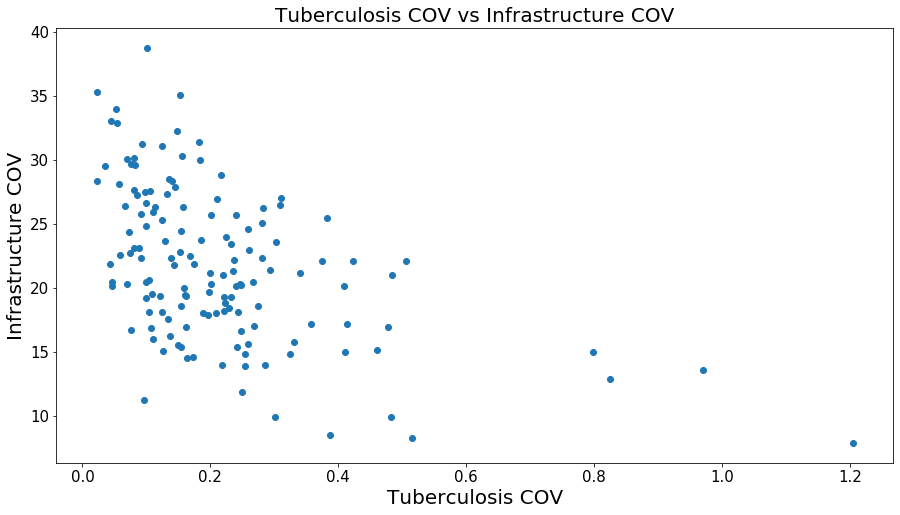

In [34]:
fig, ax = plt.subplots(figsize = (15,8))
ax.scatter(tb_merge['Tuberculosis COV'], tb_merge['COV'])
ax.set_xlabel('Tuberculosis COV', fontsize = 20)
ax.set_ylabel('Infrastructure COV', fontsize = 20)
plt.title("Tuberculosis COV vs Infrastructure COV", fontsize = 20)
plt.tick_params(labelsize=15)
plt.show()

### Interpretation

# Highest/Lowest COV for Each Disease (Top 20, Bottom 20)

# Highest/Lowest COV for Infrastructure (Top 20, Bottom 20)

# Transmission Rates Over Time for Select Countries

# Infrastructure Totals Over Time for Select Countries